# Módulo 5: Conceitualização de Redução de Dimensionalidade

## 1. Introdução: O Dilema das "Variáveis Demais"

Imagine o seguinte cenário:

> Você foi contratado para analisar o perfil de saúde de pacientes. Você tem apenas **50 pacientes**, mas, graças a exames genéticos modernos, cada paciente possui **5.000 variáveis** (colunas) diferentes.

A intuição diz: *"Quanto mais informação, melhor"*, certo? **Nem sempre.**

Quando temos **variáveis demais** (alta dimensionalidade) em relação ao número de exemplos, entramos em uma zona perigosa da matemática e da estatística conhecida como **A Maldição da Dimensionalidade**.

Neste cenário, modelos de IA começam a falhar, o cálculo de distância perde o sentido e o risco de encontrar padrões falsos (ruído) dispara. Neste notebook, vamos entender conceitualmente como resolver isso reduzindo o número de variáveis sem perder a informação essencial.

## 2. Visualizando a Maldição da Dimensionalidade

Por que "Variáveis Demais" é um problema matemático?
Porque à medida que adicionamos dimensões, o espaço se torna exponencialmente "vazio" e os dados ficam esparsos.

**Intuição Geométrica:**
* **1D (Reta):** 10 pontos cobrem bem um intervalo.
* **2D (Quadrado):** Para cobrir a mesma densidade, precisamos de $10^2 = 100$ pontos.
* **3D (Cubo):** Precisamos de $10^3 = 1000$ pontos.
* **100D (Hipercubo):** Precisamos de $10^{100}$ pontos.

Como raramente temos dados infinitos, em altas dimensões nossos dados formam "ilhas" isoladas no vácuo. Vamos visualizar isso:

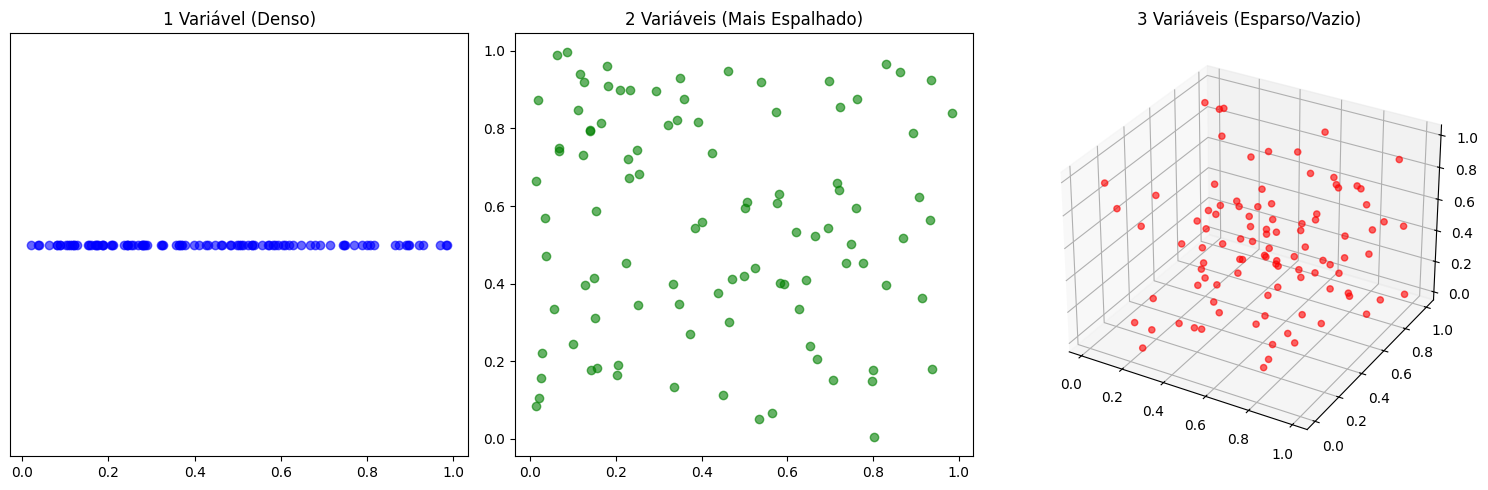

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))
n_points = 100

d1 = np.random.rand(n_points)
plt.subplot(131)
plt.scatter(d1, np.zeros_like(d1), alpha=0.6, c='blue')
plt.title('1 Variável (Denso)')
plt.yticks([])

d2 = np.random.rand(n_points, 2)
plt.subplot(132)
plt.scatter(d2[:, 0], d2[:, 1], alpha=0.6, c='green')
plt.title('2 Variáveis (Mais Espalhado)')

d3 = np.random.rand(n_points, 3)
ax = plt.subplot(133, projection='3d')
ax.scatter(d3[:, 0], d3[:, 1], d3[:, 2], alpha=0.6, c='red')
ax.set_title('3 Variáveis (Esparso/Vazio)')

plt.tight_layout()
plt.show()

## 3. Quando Feature Engineering Vira o Vilão

Muitas vezes, o aumento de dimensionalidade é culpa nossa.

### O Caso do "One-Hot Encoding" Desenfreado
Imagine o dataset do Titanic.
* Variável `Sexo` (M/F) $\rightarrow$ Vira 2 colunas. (OK!)
* Variável `Ticket` (Ex: "A/5 21171") $\rightarrow$ Se fizermos One-Hot Encoding aqui, podemos criar **centenas de novas colunas**, uma para cada ticket único.

**O Problema:**
Com tantas colunas novas e vazias, o modelo pode encontrar coincidências falsas, como: *"Todo passageiro com Ticket final 89 sobreviveu"*. Isso é **Overfitting** causado pelo excesso de dimensões. Reduzir a dimensionalidade é limpar esse ruído que pode erroneamente ser interpretado como um sinal.

## 4. Conceito Matemático: Subespaços e Projeções

Se temos dados em 3D que na verdade são planos (como uma folha de papel flutuando), não precisamos de 3 coordenadas (X, Y, Z) para descrevê-los. Precisamos apenas de 2 coordenadas novas que descrevam a posição na folha.

**A Ideia da "Sombra" (Projeção):**
Redução de dimensionalidade é basicamente encontrar a melhor posição para colocar uma lanterna e projetar a sombra dos dados em uma parede (menor dimensão).
* Queremos a sombra que mostre o formato real do objeto.
* Não queremos a sombra que esconda os detalhes.

Matematicamente, buscamos um **Subespaço** que preserve a **Variância** (a informação/espalhamento) dos dados originais.

## 5. As Famílias de Algoritmos

Como fazemos essa projeção matemática? Depende do formato dos dados.

### A. Redução Linear (O "Achatamento")
Se os dados formam uma reta ou um plano reto, usamos métodos lineares.
* **PCA (Principal Component Analysis):** O mais famoso. Gira os eixos para encontrar onde os dados estão mais espalhados e descarta o resto. Realiza essa operação a partir dos autovetores de uma matriz de covariâncias, que determinam a direção dos novos eixos e os autovalores determinando a importância de cada um.
* **Quando usar:** Dados tabulares clássicos, pré-processamento padrão. É, também, uma técnica de fácil interpretação e baixa complexidade.

### B. Redução Não-Linear (O "Desenrolamento")
Se os dados formam curvas complexas (como um rocambole ou uma ferradura), ou seja, apresentam relação não linear, uma reta não serve. Precisamos "desdobrar" o espaço.
* **t-SNE / UMAP:** Ótimos para visualização. Tentam manter vizinhos próximos na dimensão original ainda próximos na dimensão reduzida. O t-SNE opera a partir da minimização de uma função perda relacionada à diferença das distâncias na dimensão original e reduzida. O objetivo é preservar as probabilidades da vizinhança, ou seja: se dois pontos são vizinhos em alta dimensão, deve haver alta probabilidade de continuarem vizinhos em baixa dimensão. O UMAP por sua vez utiliza grafos para determinar a redução.
* **Autoencoders (Deep Learning):** Redes neurais que aprendem a compactar dados complexos.
* **Quando usar:** Imagens, textos, genoma. Quaisquer conjuntos de dados que apresentem relação não linear.

Vamos visualizar a diferença entre tentar "achatar" (Linear) e "desenrolar" (Não-Linear) um conjunto de dados complexo:

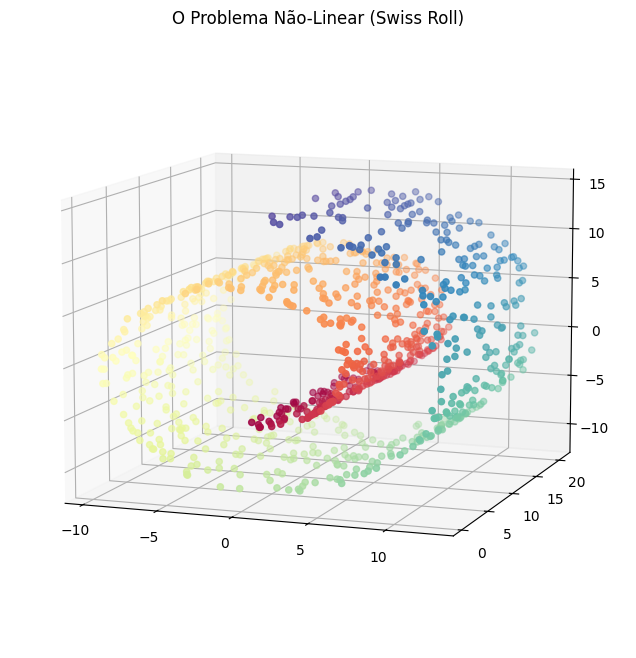

Conceito: Se usarmos PCA (Linear) aqui, vamos esmagar o rocambole e misturar as cores.
Precisamos de métodos Não-Lineares (como Autoencoders) para desenrolar essa estrutura.


In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

X, color = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("O Problema Não-Linear (Swiss Roll)")
ax.view_init(10, -70)
plt.show()

print("Conceito: Se usarmos PCA (Linear) aqui, vamos esmagar o rocambole e misturar as cores.")
print("Precisamos de métodos Não-Lineares (como Autoencoders) para desenrolar essa estrutura.")

## 6. Conclusão

A Redução de Dimensionalidade não é apenas "deletar colunas". É uma técnica matemática para destilar a essência da informação.

Resumo do Conceito:
1. **Variáveis Demais** atrapalham o aprendizado (Maldição da Dimensionalidade).
2. O objetivo é encontrar um **Subespaço** (projeção) que mantenha o sinal e descarte o ruído.
3. Para dados simples, usamos métodos lineares (**PCA**).
4. Para dados complexos, usamos métodos não-lineares (**Autoencoders/t-SNE**).

Nos próximos notebooks práticos, veremos como aplicar o PCA e Autoencoders para resolver esses problemas na vida real.